**Automatic Labelling Data**

Karena data yang digunakan cukup besar, tidak memungkinkan untuk di lakukan labelling secara manual, oleh karena itu menggunakan library TextBlob untuk pelabellan otomatis

namun saat ini textblob belum mendukung untuk pelabelan sentimen otomatis dalam bahasa indonesia, itu mengapa dalam konteks ini saya menggunakan google translate

mengubah kolom 'komentar' ke dalam bahasa inggris menggunakan translator lalu textblob akan melakukan peballeban otomatis dalam bahasa inggris

kekurangan : kurangnya akurasi dalam pelabellan data

In [1]:
import textblob
import pandas as pd
from textblob import TextBlob
import googletrans
from googletrans import Translator
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


In [2]:
file_path = "/Users/alipmaskhuri/skripsi/Dataset/dataset_clean.csv"
df = pd.read_csv(file_path)

In [4]:
df

,komentar
0,dulu mikir beli nyata bagai jual jadi korban p...
1,udah banyak banget korban sama kalau salah lam...
2,saran baik ambil langkah hukum lapor polisi ju...
3,bantu viralin admin kagak beres banyak bener k...
4,marketplace berani putus kerja sama bareng jne...
...,...
16104,tadinya pernah kasi bintang 5 update terakhir ...
16105,tempat belanja favorit saran aja buat tokoped...
16106,apabila aplikasi update terbaru pastikan berat...
16107,tampilan pembaruan sekarang sangat bagustapi r...


In [5]:
df.dtypes

komentar    object
dtype: object

In [6]:
df['komentar'] = df['komentar'].astype(str)

**Used pre-trained IndoBERT Base Model**

Memanfaatkan model yang sudah dilatih sebelumnya dengan dataset besar untuk labelling dataset saya agar mendapatkan hasil yang maksimal

In [9]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

# Load model dan tokenizer
pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Mapping label dari model ke label yang diinginkan
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Fungsi untuk mendapatkan sentimen dan skornya
def get_sentiment(text):
    result = sentiment_analysis(text)
    label = label_index[result[0]['label']]
    score = result[0]['score']
    return label, score

# Terapkan fungsi ke kolom komentar
df[['sentiment', 'score']] = df['komentar'].apply(lambda x: pd.Series(get_sentiment(x)))

# Hasil
print(df['sentiment'].value_counts())  # Distribusi sentimen
print(df)  # DataFrame dengan sentimen dan skor


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


sentiment
negative    8959
neutral     4046
positive    3104
Name: count, dtype: int64
                                                komentar sentiment     score
0      dulu mikir beli nyata bagai jual jadi korban p...  negative  0.989708
1      udah banyak banget korban sama kalau salah lam...  negative  0.996258
2      saran baik ambil langkah hukum lapor polisi ju...   neutral  0.500557
3      bantu viralin admin kagak beres banyak bener k...  negative  0.996809
4      marketplace berani putus kerja sama bareng jne...  negative  0.992148
...                                                  ...       ...       ...
16104  tadinya pernah kasi bintang 5 update terakhir ...  negative  0.987498
16105  tempat belanja favorit  saran aja buat tokoped...   neutral  0.921819
16106  apabila aplikasi update terbaru pastikan berat...   neutral  0.977908
16107  tampilan pembaruan sekarang sangat bagustapi r...  negative  0.754314
16108  lemot nyaa hadehh udah enak pake dulu malah pe...  negative

In [10]:
df.to_csv('/Users/alipmaskhuri/skripsi/Dataset/tokopedia_berlabel.csv', index=False, encoding='utf-8')

In [5]:
#TextBlob Labelling

# df = pd.DataFrame(df.komentar)
# translator = Translator()
# translations = {}
# for column in df.columns:
#   #unique elements dari kolom
#   unique_elements = df[column].unique()
#   for element in unique_elements:
#     #memasukkan terjemahan ke kamus
#     translations[element] = translator.translate(element).text

# #masukin hasil translate ke kolom baru
# df['translated_text'] = df.replace(translations)

# df.head()

,komentar,translated_text
0,dulu mikir beli nyata bagai jual jadi korban p...,I used to think that buying for real was like ...
1,udah banyak banget korban sama kalau salah lam...,There have been so many victims of the same th...
2,saran baik ambil langkah hukum lapor polisi ju...,"Good advice, take legal steps, report to the p..."
3,bantu viralin admin kagak beres ini banyak ben...,help viral admin this is not right there are m...
4,marketplace berani putus kerja sama bareng jne...,Marketplace dares to stop working together wit...


In [14]:
# def subjektivitas(tr_text):
#   return TextBlob(tr_text).sentiment.subjectivity

# def polaritas(tr_text):
#   return TextBlob(tr_text).sentiment.polarity

# # def hasilSentimen(nilai):
# #     if nilai < 0:
# #         return 'negatif'
# #     else:
# #         return 'positif'

# def hasilSentimen(nilai):
#   if nilai < 0:
#     return '-1'
#   elif nilai == 0:
#     return '0'
#   else:
#     return '1'

# df['subjektivitas'] = df['translated_text'].apply(subjektivitas)
# df['polaritas'] = df['translated_text'].apply(polaritas)
# df['sentimen'] = df['polaritas'].apply(hasilSentimen)

# df.head(20)

,komentar,translated_text,subjektivitas,polaritas,sentimen
0,dulu mikir beli nyata bagai jual jadi korban p...,I used to think that buying for real was like ...,0.175000,0.062500,1
1,udah banyak banget korban sama kalau salah lam...,There have been so many victims of the same th...,0.287500,0.112500,1
2,saran baik ambil langkah hukum lapor polisi ju...,"Good advice, take legal steps, report to the p...",0.310000,0.285000,1
3,bantu viralin admin kagak beres ini banyak ben...,help viral admin this is not right there are m...,0.517857,0.178571,1
4,marketplace berani putus kerja sama bareng jne...,Marketplace dares to stop working together wit...,0.480556,0.052778,1
5,jne rasa rosalia indah curiga banget laporin a...,jne rasa rosalia indah very suspicious report ...,0.300000,0.200000,1
6,baca nyata juga jadi korban kirim kamera statu...,Really read that I was also a victim of sendin...,0.125000,0.062500,1
7,ya kalian tidak kapok begitu banyak kasus cuku...,"yes, you guys don't give up, there are so many...",0.425000,0.300000,1
8,seram sih kalau jadi korban duit gede tipu eco...,scary if you become a victim of big money scam...,0.312500,-0.143750,-1
9,kalau lapor polisi gimana bang siapa tau tinda...,"What if you report it to the police, who knows...",0.000000,0.000000,0


In [15]:
# df['sentimen'].value_counts()

sentimen
1     8274
-1    5216
0     3001
Name: count, dtype: int64

Text(0.5, 1.0, 'Persentase Masing-Masing Sentimen')

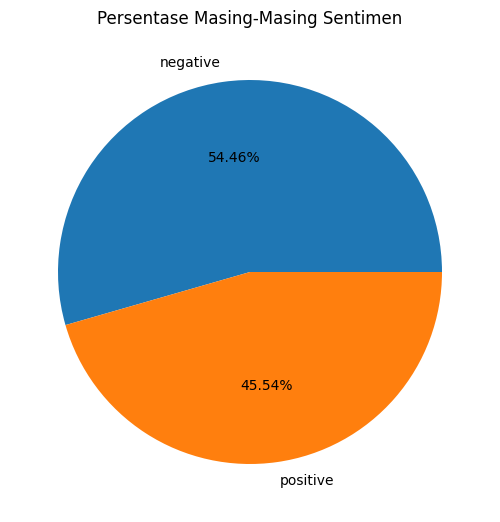

In [12]:
diagram = df['sentiment'].value_counts().rename_axis('nilai_sentimen').reset_index(name='jumlah')
label = diagram.nilai_sentimen
nilai = diagram.jumlah

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')


ax.pie(nilai, labels = label, autopct='%1.2f%%' )
ax.set_title("Persentase Masing-Masing Sentimen")

In [22]:
sentences = [words for words in df.komentar]
sentences = ' '.join(sentences)

In [23]:
stopwords_id_en = stopwords.words('indonesian') + ['yg'] + stopwords.words('english')

In [24]:
import plotly.graph_objs as go
most_com_words_list = [[word] for words in sentences.split() for word in words.split(', ') if word not in stopwords_id_en]

temp = pd.DataFrame(most_com_words_list, columns=['most_com_words'])
most_com_words = temp.most_com_words.value_counts()[:50]

trace = go.Bar(
            x=most_com_words.values, 
            y=most_com_words.index,
            hovertemplate='<extra></extra>Words: %{y}'+'<br>Count: %{x:.0f}',
            orientation='h'
            )

layout = go.Layout(
            title=dict(
                    text='Most Common Words',
                    x=0.5,
                    font_size=25
                    ),
            yaxis=dict(autorange='reversed'),
            xaxis_title='Count',
            yaxis_title='Words', 
            width=800,
            height=1000
            )

go.Figure(data=trace, layout=layout)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': '<extra></extra>Words: %{y}<br>Count: %{x:.0f}',
              'orientation': 'h',
              'type': 'bar',
              'x': array([11213,  3894,  3836,  3577,  3433,  2989,  2870,  2766,  2551,  2410,
                           2321,  2291,  2260,  2163,  2112,  1978,  1929,  1719,  1684,  1469,
                           1468,  1409,  1336,  1213,  1179,  1171,  1124,  1113,  1065,  1062,
                           1052,  1035,  1015,   997,   995,   981,   980,   974,   958,   958,
                            944,   938,   877,   865,   859,   830,   826,   808,   764,   763]),
              'y': array(['tokopedia', 'nya', 'barang', 'beli', 'diskon', 'gak', 'aplikasi',
                          'belanja', 'promo', 'pengiriman', 'aja', 'banget', 'kurir', 'udah',
                          'voucher', 'toko', 'ongkir', 'pake', 'sistem', 'transaksi', 'pakai',
                          'kecewa', 'gratis', 'kirim', 'cek', 'rekomendasi', 'bayar', 'harga',
                          'shopee', '1', 'paket', '2', 'biaya', 'akun', 'kali', 'pas', 'bagus',
                          'dibatalkan', 'update', 'pengguna', 'pembayaran', 'kasih', 'sih',
                          'langsung', 'produk', 'pesanan', 'gk', 'penjual', 'mudah', 'cepat'],
                         dtype=object)}],
    'layout': {'height': 1000,
               'template': '...',
               'title': {'font': {'size': 25}, 'text': 'Most Common Words', 'x': 0.5},
               'width': 800,
               'xaxis': {'title': {'text': 'Count'}},
               'yaxis': {'autorange': 'reversed', 'title': {'text': 'Words'}}}
})

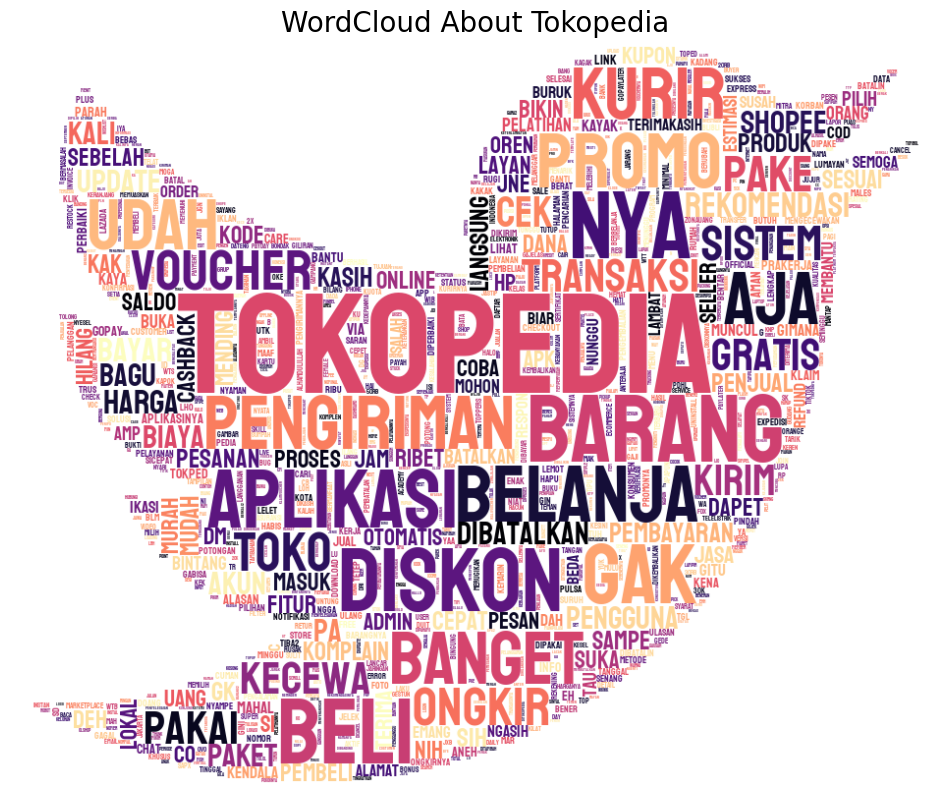

In [25]:
import numpy as np
mask = np.array(Image.open('/Users/alipmaskhuri/skripsi/Dataset/wordcloud/twitter-mask.png'))
font = '/Users/alipmaskhuri/skripsi/Dataset/wordcloud/Staatliches-Regular.ttf'

wordcloud = WordCloud(
                background_color='white', stopwords=set(stopwords_id_en), 
                mask=mask, font_path=font, 
                random_state=42, max_words=1000,
                width=mask.shape[0], height=mask.shape[1],
                colormap='magma', collocations=False
                ).generate(sentences)

plt.figure(figsize=(12, 12))
plt.title('WordCloud About Tokopedia', fontdict={'size': 20})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
#Save to new dataset file
df.to_csv('/Users/alipmaskhuri/skripsi/tokpedfix_berlabel.csv', index=False, encoding='utf-8')